#### Decision

Se elige utilizar el modelo de XGBoost por las metricas obtenidas por el mismo, a continuacion se analiza mas detalladamente


In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",40)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("path_datos_entrenamiento" , sep = "|")

In [3]:
import xgboost as xgb

In [4]:
# Separate the target variable and rest of the variables using .iloc to subset the data.
X,y = df.iloc[:,1:-1],df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [6]:
xg_reg = xgb.XGBClassifier()

In [6]:
xg_reg = xgb.XGBClassifier(subsample=0.6, min_child_weight=1, max_depth=5, gamma=2, colsample_bytree=0.8)

In [7]:
xg_reg.fit(X_train,y_train)

XGB_preds = xg_reg.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,XGB_preds))
print(confusion_matrix(y_test,XGB_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    190508
           1       0.70      0.66      0.68     70674

    accuracy                           0.83    261182
   macro avg       0.79      0.78      0.79    261182
weighted avg       0.83      0.83      0.83    261182

[[170800  19708]
 [ 23710  46964]]


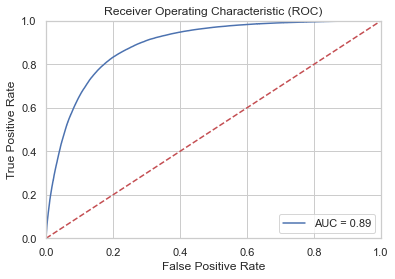

In [10]:

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xg_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

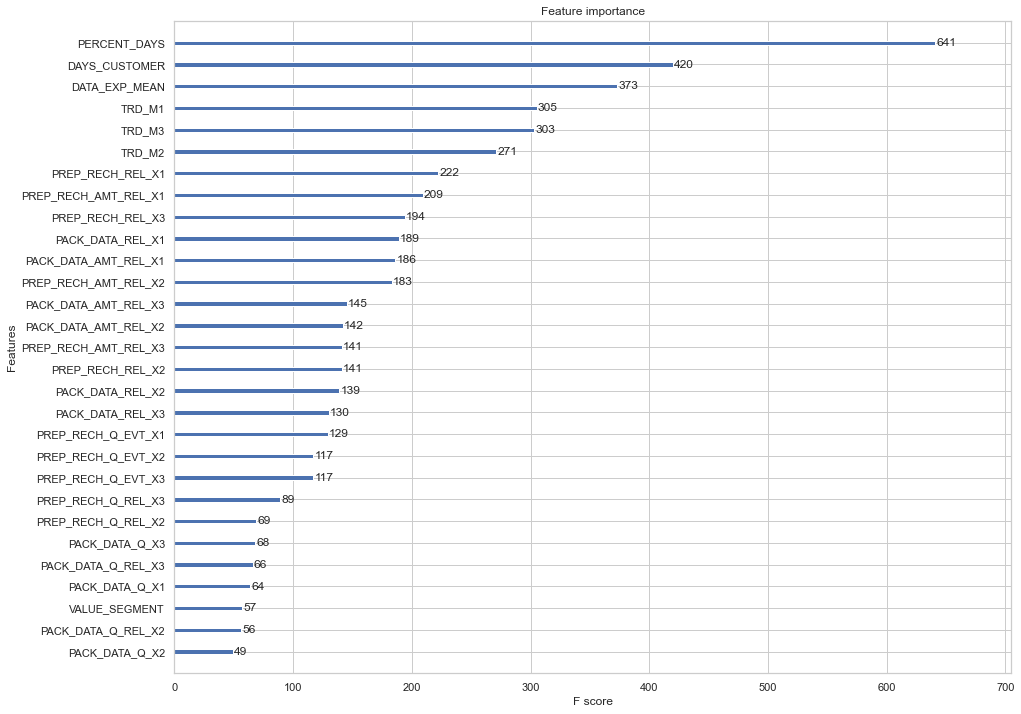

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 12]

In [12]:
#  Ahora vamos a predecir la probabilidad de recargar de todos los usuarios

XGB_proba_total = xg_reg.predict_proba(X)
XGB_proba_total.shape

(870606, 2)

In [13]:
# como vemos el resultado es un array de probabilidades con dos dimensiones

xg_reg.classes_
# este atributo nos devuelve un array indicandonos a que corresponde cada columna del array de probabilidades
# es decir la primer columna corresponde a la probabilidad de que sea 0 , y la segunda a la probabilidad de 
# que sea 1

array([0, 1], dtype=int64)

In [14]:
# siendo 0 que el cliente se queda y 1 que se va, vamos a tomar la probabilidad de que el cliente se vaya
# para nuestra columna de probabilidades

df["probabilidad"] = XGB_proba_total[:,0]
df.head()

,SUSCRIBER_KEY,VALUE_SEGMENT,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,TRD_M1,TRD_M2,TRD_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,DATA_EXP_MEAN,PREP_RECH_AMT_REL_X1,PREP_RECH_AMT_REL_X2,PREP_RECH_AMT_REL_X3,PACK_DATA_AMT_REL_X1,PACK_DATA_AMT_REL_X2,PACK_DATA_AMT_REL_X3,PREP_RECH_Q_REL_X2,PREP_RECH_Q_REL_X3,PACK_DATA_Q_REL_X2,PACK_DATA_Q_REL_X3,PREP_RECH_REL_X1,PREP_RECH_REL_X2,PREP_RECH_REL_X3,PACK_DATA_REL_X1,PACK_DATA_REL_X2,PACK_DATA_REL_X3,DAYS_CUSTOMER,PERCENT_DAYS,target,probabilidad
0,CW_DPRE_65306301_20181124,1,1.0,4.0,6.0,8.76,23.49,18.98,1.0,3.0,6.0,7.833333,0.121951,0.402439,0.475610,0.137061,0.411184,0.451754,0.80000,0.545455,0.75,0.600000,5.000000,4.125,3.25,5.000000,5.000000,2.746667,288,0.968750,0,0.816008
1,CW_DPRE_66645894_20150701,1,3.0,3.0,2.0,2.88,1.94,3.08,3.0,3.0,2.0,6.583333,0.464286,0.321429,0.214286,0.444444,0.333333,0.222222,0.50000,0.250000,0.50,0.250000,4.333333,3.000,3.00,4.000000,3.000000,3.000000,1530,0.998693,0,0.966987
2,CW_DPRE_65306080_20160428,2,3.0,1.0,0.0,25.81,0.13,0.00,3.0,1.0,0.0,2.583333,0.833333,0.166667,0.000000,0.882872,0.117128,0.000000,0.25000,0.000000,0.25,0.000000,5.000000,3.000,0.00,5.000000,1.990000,0.000000,1228,0.991042,0,0.815074
3,CW_DPRE_67558747_20181225,2,1.0,1.0,4.0,7.25,14.09,9.18,1.0,1.0,4.0,5.500000,0.185185,0.185185,0.629630,0.196078,0.196078,0.607843,0.50000,0.666667,0.50,0.666667,5.000000,5.000,4.25,5.000000,5.000000,3.875000,257,0.906615,0,0.577722
4,CW_DPRE_69672979_20150701,0,11.0,10.0,4.0,25.33,14.27,12.16,11.0,9.0,4.0,8.000000,0.430556,0.347222,0.222222,0.442951,0.328281,0.228768,0.47619,0.160000,0.45,0.166667,2.818182,2.500,4.00,2.816364,2.551111,4.000000,1530,1.000000,0,0.995692


Text(0.5, 1.0, 'Valores predichos')

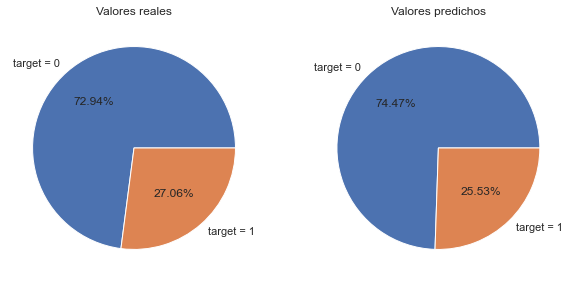

In [25]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

langs = ['target = 0', 'target = 1']
students = [np.count_nonzero(y_test.values == 0),np.count_nonzero(y_test.values == 1)]
axs[0].pie(students, labels = langs,autopct='%1.2f%%')
axs[0].set_title('Valores reales')

students = [np.count_nonzero(XGB_preds == 0),np.count_nonzero(XGB_preds == 1)]
axs[1].pie(students, labels = langs,autopct='%1.2f%%')
axs[1].set_title('Valores predichos')

# comparacion entre los valores reales y los valores predichos por el modelo